# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy

import datetime
from datetime import date
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

api_key = weather_api_key

url  =f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=metric&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url+city

   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather= requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | polyarnyy
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | black river
Processing Record 6 of Set 1 | floro
Processing Record 7 of Set 1 | rumonge
Processing Record 8 of Set 1 | taft
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | east ballina
Processing Record 11 of Set 1 | hihifo
City not found. Skipping...
Processing Record 12 of Set 1 | waingapu
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | halifax
Processing Record 15 of Set 1 | letlhakane
Processing Record 16 of Set 1 | conceicao da barra
Processing Record 17 of Set 1 | nieuw amsterdam
Processing Record 18 of Set 1 | chonchi
Processing Record 19 of Set 1 | saqqez
Processing Record 20 of Set 1 | howard springs
Processing Record 21 of Set 1 | fuvahmulah
City n

Processing Record 38 of Set 4 | lisakovsk
Processing Record 39 of Set 4 | dudinka
Processing Record 40 of Set 4 | tongliao
Processing Record 41 of Set 4 | atmakur
Processing Record 42 of Set 4 | aberystwyth
Processing Record 43 of Set 4 | javea
Processing Record 44 of Set 4 | xilin hot
Processing Record 45 of Set 4 | kiunga
Processing Record 46 of Set 4 | amasra
Processing Record 47 of Set 4 | molde
Processing Record 48 of Set 4 | talnakh
Processing Record 49 of Set 4 | sitka
Processing Record 0 of Set 5 | emerald
Processing Record 1 of Set 5 | suonenjoki
Processing Record 2 of Set 5 | lan sak
Processing Record 3 of Set 5 | yeppoon
Processing Record 4 of Set 5 | mabaruma
Processing Record 5 of Set 5 | qamdo
Processing Record 6 of Set 5 | tomatlan
Processing Record 7 of Set 5 | antsiranana
Processing Record 8 of Set 5 | bayan nur
City not found. Skipping...
Processing Record 9 of Set 5 | colonia
Processing Record 10 of Set 5 | revda
Processing Record 11 of Set 5 | alofi
Processing Recor

Processing Record 28 of Set 8 | panorama
Processing Record 29 of Set 8 | ar ruseris
Processing Record 30 of Set 8 | saint-pierre
Processing Record 31 of Set 8 | gheorgheni
Processing Record 32 of Set 8 | klyuchi
Processing Record 33 of Set 8 | severo-yeniseyskiy
Processing Record 34 of Set 8 | kirakira
Processing Record 35 of Set 8 | geraldton
Processing Record 36 of Set 8 | pekanbaru
Processing Record 37 of Set 8 | heighington
Processing Record 38 of Set 8 | kolonia
Processing Record 39 of Set 8 | tamanrasset
Processing Record 40 of Set 8 | nishinoomote
Processing Record 41 of Set 8 | suoyarvi
Processing Record 42 of Set 8 | borogontsy
Processing Record 43 of Set 8 | diffa
Processing Record 44 of Set 8 | nova vicosa
Processing Record 45 of Set 8 | chimbote
Processing Record 46 of Set 8 | misterbianco
Processing Record 47 of Set 8 | nyurba
Processing Record 48 of Set 8 | puerto baquerizo moreno
Processing Record 49 of Set 8 | ljusdal
Processing Record 0 of Set 9 | ta`u
Processing Recor

Processing Record 16 of Set 12 | luderitz
Processing Record 17 of Set 12 | altamira
Processing Record 18 of Set 12 | qingdao
Processing Record 19 of Set 12 | vila do maio
Processing Record 20 of Set 12 | shubarshi
Processing Record 21 of Set 12 | talcahuano
Processing Record 22 of Set 12 | camayenne
Processing Record 23 of Set 12 | rani
Processing Record 24 of Set 12 | malegaon
Processing Record 25 of Set 12 | hasaki
Processing Record 26 of Set 12 | saint-junien
Processing Record 27 of Set 12 | langsa
Processing Record 28 of Set 12 | el granada
Processing Record 29 of Set 12 | thames
Processing Record 30 of Set 12 | alaghsas
Processing Record 31 of Set 12 | xintai
Processing Record 32 of Set 12 | kirkland lake
Processing Record 33 of Set 12 | norrtalje
Processing Record 34 of Set 12 | chegdomyn
Processing Record 35 of Set 12 | westport
Processing Record 36 of Set 12 | yangor
City not found. Skipping...
Processing Record 37 of Set 12 | kuching
Processing Record 38 of Set 12 | fort mcmur

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,19.24,54,70,2.51,RU,1690348005
1,polyarnyy,69.1989,33.4478,10.86,92,99,2.53,RU,1690348005
2,grytviken,-54.2811,-36.5092,-3.11,84,88,4.36,GS,1690348005
3,edinburgh of the seven seas,-37.0676,-12.3116,10.64,62,100,8.77,SH,1690348005
4,black river,18.0264,-77.8487,25.97,85,75,1.74,JM,1690348005


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,19.24,54,70,2.51,RU,1690348005
1,polyarnyy,69.1989,33.4478,10.86,92,99,2.53,RU,1690348005
2,grytviken,-54.2811,-36.5092,-3.11,84,88,4.36,GS,1690348005
3,edinburgh of the seven seas,-37.0676,-12.3116,10.64,62,100,8.77,SH,1690348005
4,black river,18.0264,-77.8487,25.97,85,75,1.74,JM,1690348005


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

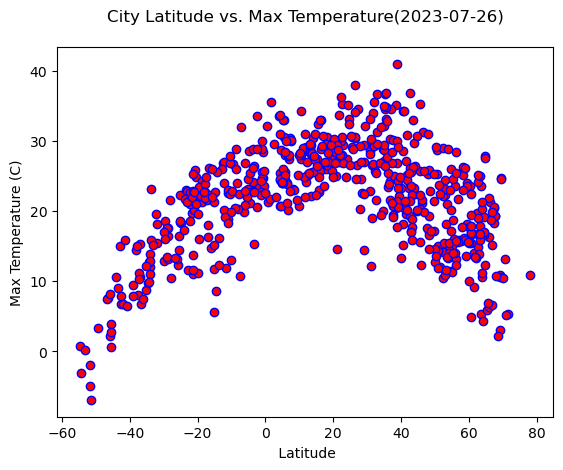

In [48]:
# Build scatter plot for latitude vs. temperature
lat=city_data_df['Lat']
temp=city_data_df['Max Temp']
t= date.today()


plt.scatter(lat, temp, marker='o', facecolors='red', edgecolors='blue',alpha=1)
# Incorporate the other graph properties
plt.title( f'City Latitude vs. Max Temperature({t})\n')
plt.ylabel('Max Temperature (C)')
plt.xlabel(' Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

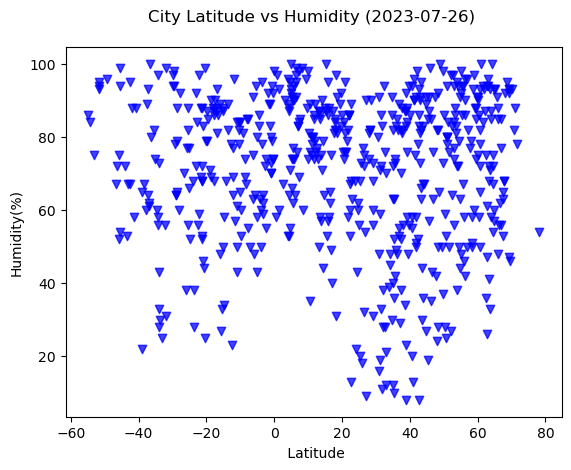

In [45]:
# Build the scatter plots for latitude vs. humidity
lat=city_data_df['Lat']
hum=city_data_df['Humidity']
t= date.today()
plt.scatter(lat, hum, marker='v', facecolors='blue', edgecolors='blue',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'City Latitude vs Humidity ({t}) \n')
plt.ylabel('Humidity(%)')
plt.xlabel(' Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

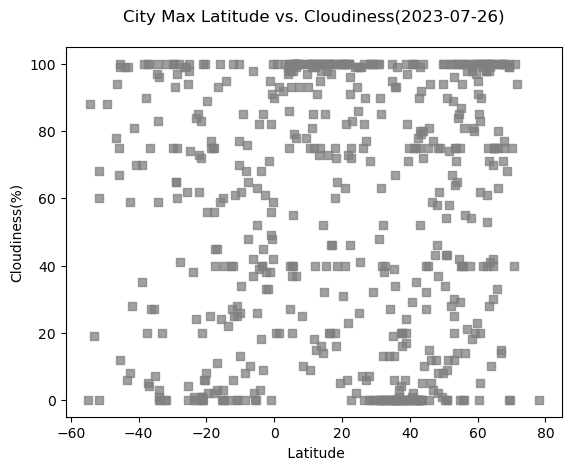

In [41]:
# Build the scatter plots for latitude vs.Cloudiness
lat=city_data_df['Lat']
cl=city_data_df['Cloudiness']
t= date.today()
plt.scatter(lat, cl, marker='s', facecolors='gray', edgecolors='gray',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'City Max Latitude vs. Cloudiness({t})\n')
plt.ylabel('Cloudiness(%)')
plt.xlabel(' Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()





#### Latitude vs. Wind Speed Plot

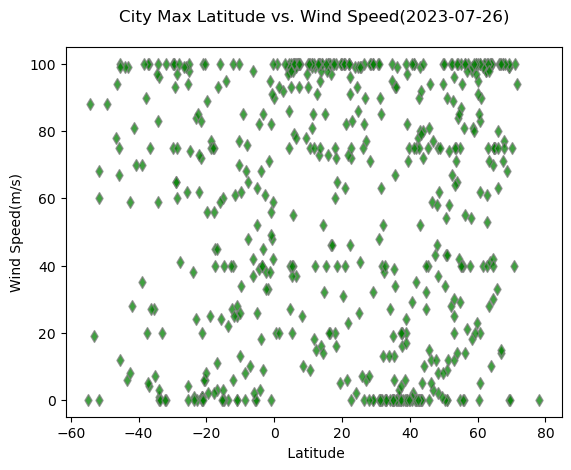

In [49]:
# Build the scatter plots for latitude vs. Wind Speed
# Build the scatter plots for latitude vs.Cloudiness
lat=city_data_df['Lat']
wind=city_data_df['Cloudiness']
t= date.today()
plt.scatter(lat, wind, marker='d', facecolors='green', edgecolors='gray',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'City Max Latitude vs. Wind Speed({t})\n')
plt.ylabel('Wind Speed(m/s)')
plt.xlabel(' Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def regress_values(x_value, y_value,slope, intercept, rvalue, pvalue,stderr):
    regress_values= x_value*slope+intercept
    return;

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,19.24,54,70,2.51,RU,1690348005
1,polyarnyy,69.1989,33.4478,10.86,92,99,2.53,RU,1690348005
4,black river,18.0264,-77.8487,25.97,85,75,1.74,JM,1690348005
5,floro,61.5996,5.0328,13.98,94,40,2.57,NO,1690348006
7,taft,31.7471,54.2088,33.97,11,40,1.03,IR,1690348006


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,-3.11,84,88,4.36,GS,1690348005
3,edinburgh of the seven seas,-37.0676,-12.3116,10.64,62,100,8.77,SH,1690348005
6,rumonge,-3.9736,29.4386,22.85,50,18,1.33,BI,1690348006
8,pisco,-13.7000,-76.2167,16.12,82,0,1.03,PE,1690348006
9,east ballina,-28.8667,153.5833,17.67,64,65,4.79,AU,1690348006


###  Temperature vs. Latitude Linear Regression Plot

##### Temperature vs. Latitude Linear Regression Plot on Northern Hemisphere

the r-value is:-0.5988382098184267
y=-0.21x+31.35


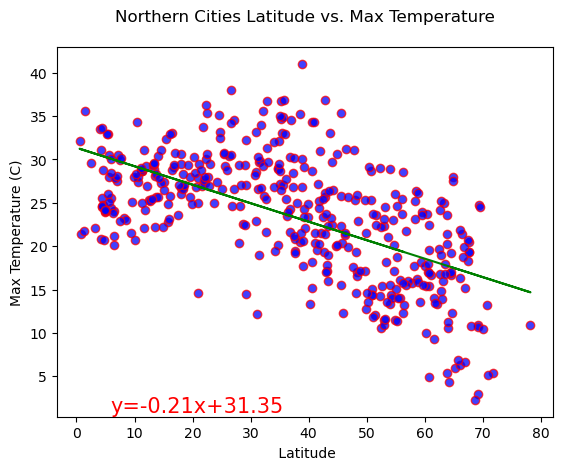

In [57]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
lat=northern_hemi_df['Lat']
temp=northern_hemi_df['Max Temp']
plt.scatter(lat, temp, marker='o', facecolors='blue', edgecolors='red',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'Northern Cities Latitude vs. Max Temperature\n')
plt.ylabel('Max Temperature (C)')
plt.xlabel(' Latitude')

# Linear regression
(slope, intercept, rvalue, pvalue,stderr) = linregress(lat, temp)

#regress_values(lat, temp,slope, intercept, rvalue, pvalue,stderr)
regress_values= lat*slope+intercept
line_eq='y='+str(round(slope,2))+'x+'+ str(round(intercept,2))
plt.plot(lat,regress_values,'green')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color='red')

print(f'the r-value is:{rvalue}')
print (line_eq)

##### Temperature vs. Latitude Linear Regression Plot on Southern Hemisphere

the r-value is:0.8073559019818579
y=0.43x+26.99


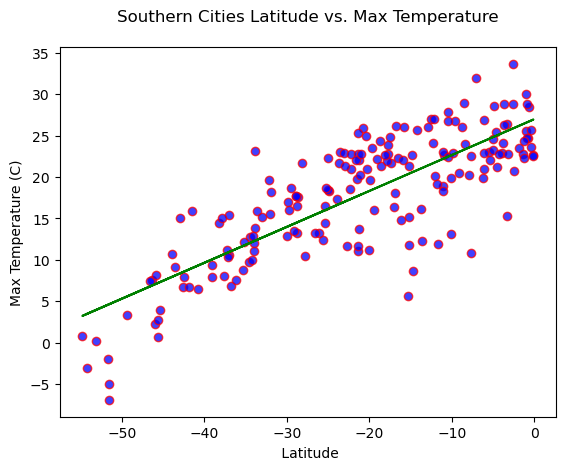

In [60]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
lat=southern_hemi_df['Lat']
temp=southern_hemi_df['Max Temp']
plt.scatter(lat, temp, marker='o', facecolors='blue', edgecolors='red',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'Southern Cities Latitude vs. Max Temperature\n')
plt.ylabel('Max Temperature (C)')
plt.xlabel(' Latitude')

# Linear regression
(slope, intercept, rvalue, pvalue,stderr) = linregress(lat, temp)

#regress_values(lat, temp,slope, intercept, rvalue, pvalue,stderr)
regress_values= lat*slope+intercept
line_eq='y='+str(round(slope,2))+'x+'+ str(round(intercept,2))
plt.plot(lat,regress_values,'green')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color='red')

print(f'the r-value is:{rvalue}')
print (line_eq)

**Discussion about the linear relationship:
- There is a negative correlation between temperature and latitude with a negative correlation coefficient on Northern Hemisphere.
- The r-value is between -0.7 and -0.5. The Temperature and Latitude are considered moderately correlated on Northern Hemisphere. 

- There is a positive correlation between temperature and latitude with a positive correlation coefficient on Southern Hemisphere.
- The r-value is between higher than 0.7. The Temperature and Latitude are considered highly correlated on Northern Hemisphere.


-->Temperature is inversely related to latitude. As latitude increases, the temperature falls, and vice versa. Generally, around the world, it gets warmer towards the equator and cooler towards the poles

### Humidity vs. Latitude Linear Regression Plot

##### Humidity vs. Latitude Linear Regression Plot on Northern Hemisphere

the r-value is:-0.0475670488876531
y=-0.05x+72.47


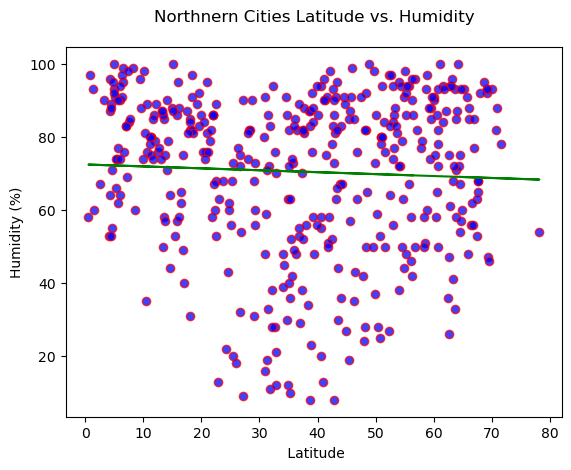

In [63]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. humidity
lat=northern_hemi_df['Lat']
hum=northern_hemi_df['Humidity']
plt.scatter(lat, hum, marker='o', facecolors='blue', edgecolors='red',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'Northnern Cities Latitude vs. Humidity\n')
plt.ylabel('Humidity (%)')
plt.xlabel(' Latitude')

# Linear regression
(slope, intercept, rvalue, pvalue,stderr) = linregress(lat, hum)

#regress_values(lat, temp,slope, intercept, rvalue, pvalue,stderr)
regress_values= lat*slope+intercept
line_eq='y='+str(round(slope,2))+'x+'+ str(round(intercept,2))
plt.plot(lat,regress_values,'green')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color='red')

print(f'the r-value is:{rvalue}')
print (line_eq)

##### Humidity vs. Latitude Linear Regression Plot on Southern Hemisphere

the r-value is:-0.007064612198535344
y=-0.01x+71.09


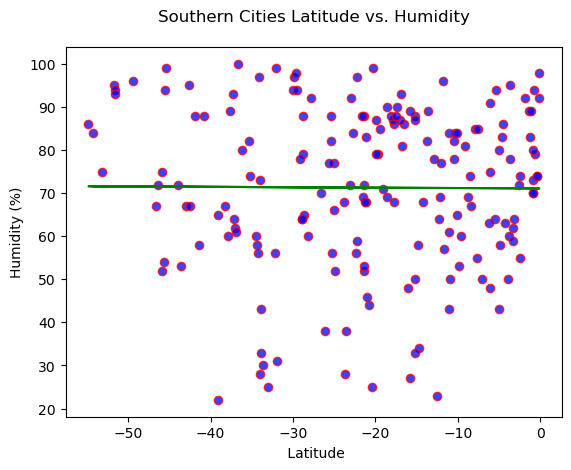

In [62]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. humidity
lat=southern_hemi_df['Lat']
hum=southern_hemi_df['Humidity']
plt.scatter(lat, hum, marker='o', facecolors='blue', edgecolors='red',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'Southern Cities Latitude vs. Humidity\n')
plt.ylabel('Humidity (%)')
plt.xlabel(' Latitude')

# Linear regression
(slope, intercept, rvalue, pvalue,stderr) = linregress(lat, hum)

#regress_values(lat, temp,slope, intercept, rvalue, pvalue,stderr)
regress_values= lat*slope+intercept
line_eq='y='+str(round(slope,2))+'x+'+ str(round(intercept,2))
plt.plot(lat,regress_values,'green')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color='red')

print(f'the r-value is:{rvalue}')
print (line_eq)

**Discussion about the linear relationship:

- The correlation between Humidity and Latitude is close to 0  on Northern Hemisphere and  Southern Hemisphere.

- The r-value is not significant. There is no correlation between Humidity and Latitude  on Northern Hemisphere and  Southern Hemisphere.

- r- value is not significant, a regression analysis should never be done.

--> The areas near the equator have much higher specific humidity than areas farther north and south




### Cloudiness vs. Latitude Linear Regression Plot

the r-value is:-0.10732925367220068
y=-0.21x+65.5


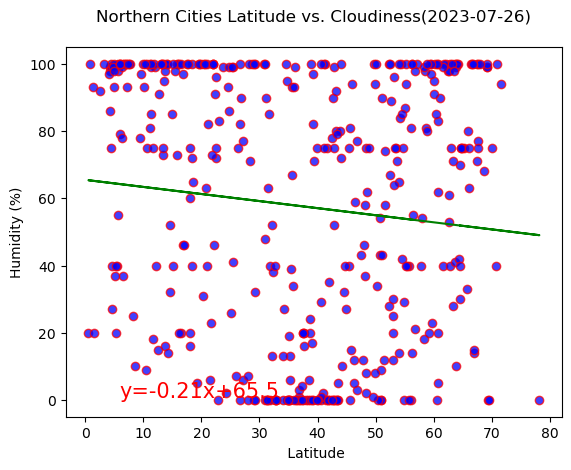

In [64]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. cloudiness
lat=northern_hemi_df['Lat']
cl=northern_hemi_df['Cloudiness']
plt.scatter(lat, cl, marker='o', facecolors='blue', edgecolors='red',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'Northern Cities Latitude vs. Cloudiness({t})\n')
plt.ylabel('Humidity (%)')
plt.xlabel(' Latitude')

# Linear regression
(slope, intercept, rvalue, pvalue,stderr) = linregress(lat, cl)

#regress_values(lat, temp,slope, intercept, rvalue, pvalue,stderr)
regress_values= lat*slope+intercept
line_eq='y='+str(round(slope,2))+'x+'+ str(round(intercept,2))
plt.plot(lat,regress_values,'green')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color='red')

print(f'the r-value is:{rvalue}')
print (line_eq)

the r-value is:-0.12267016962148326
y=-0.31x+42.21


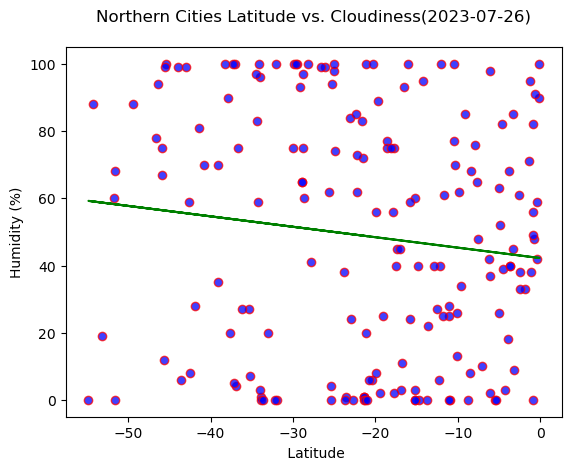

In [65]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. cloudiness
lat=southern_hemi_df['Lat']
cl=southern_hemi_df['Cloudiness']
plt.scatter(lat, cl, marker='o', facecolors='blue', edgecolors='red',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'Northern Cities Latitude vs. Cloudiness({t})\n')
plt.ylabel('Humidity (%)')
plt.xlabel(' Latitude')

# Linear regression
(slope, intercept, rvalue, pvalue,stderr) = linregress(lat, cl)

#regress_values(lat, temp,slope, intercept, rvalue, pvalue,stderr)
regress_values= lat*slope+intercept
line_eq='y='+str(round(slope,2))+'x+'+ str(round(intercept,2))
plt.plot(lat,regress_values,'green')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color='red')

print(f'the r-value is:{rvalue}')
print (line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is:-0.2393987397737975


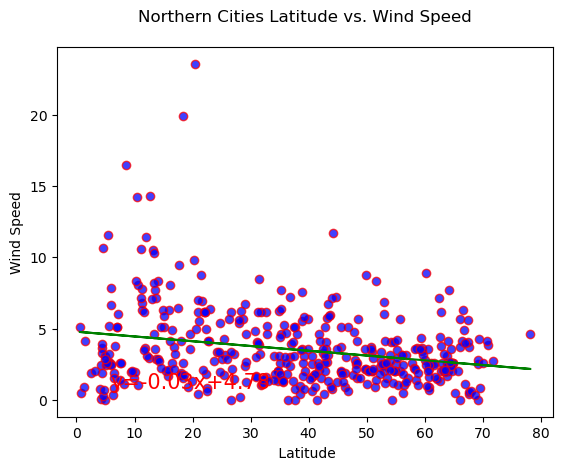

In [55]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. cloudiness
lat=northern_hemi_df['Lat']
wind=northern_hemi_df['Wind Speed']
plt.scatter(lat,wind, marker='o', facecolors='blue', edgecolors='red',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'Northern Cities Latitude vs. Wind Speed\n')
plt.ylabel('Wind Speed')
plt.xlabel(' Latitude')

# Linear regression
(slope, intercept, rvalue, pvalue,stderr) = linregress(lat, wind)

#regress_values(lat, temp,slope, intercept, rvalue, pvalue,stderr)
regress_values= lat*slope+intercept
line_eq='y='+str(round(slope,2))+'x+'+ str(round(intercept,2))
plt.plot(lat,regress_values,'green')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color='red')

print(f'the r-value is:{rvalue}')


the r-value is:-0.1154309237218035


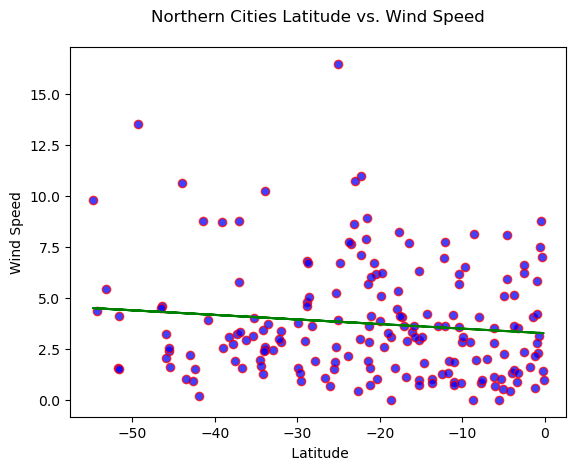

In [56]:
# Southern Hemisphere

# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. cloudiness
lat=southern_hemi_df['Lat']
wind=southern_hemi_df['Wind Speed']
plt.scatter(lat,wind, marker='o', facecolors='blue', edgecolors='red',alpha=0.75)
# Incorporate the other graph properties
plt.title( f'Northern Cities Latitude vs. Wind Speed\n')
plt.ylabel('Wind Speed')
plt.xlabel(' Latitude')

# Linear regression
(slope, intercept, rvalue, pvalue,stderr) = linregress(lat, wind)

#regress_values(lat, temp,slope, intercept, rvalue, pvalue,stderr)
regress_values= lat*slope+intercept
line_eq='y='+str(round(slope,2))+'x+'+ str(round(intercept,2))
plt.plot(lat,regress_values,'green')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color='red')

print(f'the r-value is:{rvalue}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE